# Face Landmark Timing

Although the novel idea of gaze prediction based on facial landmark seems promising, it is paramount to examining the prediction timing of the [face-alignment](https://github.com/1adrianb/face-alignment) neural network for viability.

In [1]:
import sys
sys.path.insert(0, '../')
from shared import *

IMAGE_COUNT = 1000

In [2]:
# Read metadata (including image locations)
capture_df = load_df()

# Only deal with frames where face and eyes were detected
capture_df = capture_df[capture_df['appleFace.IsValid'] == True]

In [3]:
import matplotlib.pyplot as plt
from random import sample as rand_subset
from time import sleep
from random import randint
import face_alignment

import torch
torch.cuda.set_device(1)

def pre(i):
    return frame(capture_df.iloc[i])

def post(predictions):
    return not predictions is None

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, enable_cuda=True, flip_input=False)

@supress_stdout
def predict(image):
    return fa.get_landmarks(image)

indices = rand_subset(range(capture_df.shape[0]), IMAGE_COUNT)

timing = list(map(time_this_f(predict, pre, post), indices))

/home/rcdilorenzo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/torch/nn/functional.py:1890: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


# Results

For an initial visualization, a simple histogram can be produced from the time of each prediction regardless of whether a face was detected or not.

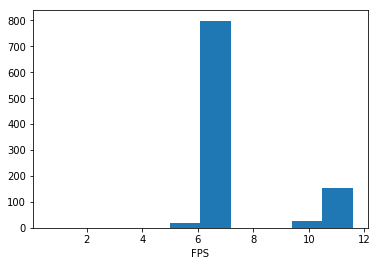

In [4]:
import matplotlib as mpl
from funcy import first, second, none_fn

def seconds_to_fps(seconds):
    return 1 / seconds

plt.hist(list(map(compose(seconds_to_fps, first), timing)), bins = 10)
plt.xlabel('FPS')
plt.show()

To understand this graphic a bit more, the following two plots (with and without landmarks) indicate the time difference.

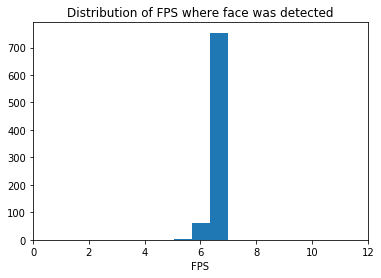

In [5]:
axes = plt.gca()
axes.set_xlim([0, 12])
axes.hist(list(map(compose(seconds_to_fps, first),
                   filter(second, timing))), bins = 10)
plt.title('Distribution of FPS where face was detected')
plt.xlabel('FPS')
plt.show()

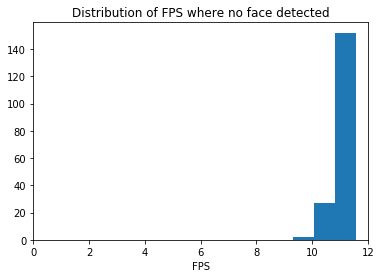

In [6]:
axes = plt.gca()
axes.set_xlim([0, 12])
axes.hist(list(map(compose(seconds_to_fps, first),
                   filter(none_fn(second), timing))), bins = 3)
plt.title('Distribution of FPS where no face detected')
plt.xlabel('FPS')
plt.show()

Therefore, when no landmarks are detected is the speed is approximately 10-12 FPS while the it drops to 6-7 FPS when the full neural network is performs a single forward pass.